In [1]:
import pandas as pd
import os


#Due to related budget cuts, the most recent fiscal data you have to work with is from 2015-16. Download the
#2015-16 district-level fiscal data from the National Center for Education Statistics’ Common Core of Data:

fiscal_df = pd.read_table('data/Sdf16_1a.txt')

#For helping you make your decision, it may be helpful to have some performance metrics for each district.
#You can download the 2015-16 data for distrct-level statistics on graduation rate and state assessments on
#mathematics and reading/language arts from the EDFacts website:

perform_math_df = pd.read_csv('data/math-achievement-sch-sy2015-16.csv')
perform_read_df = pd.read_csv('data/rla-achievement-sch-sy2015-16.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,15,19,21,23,27,33,35,37,39,47,51,53,55,57,59,63,65,69,71,77,79,81,85,87,91,99,103,107,109,111,113,115,117,119,121,123,131,133,135,137,143,145,147,149,151,155,161,165,167,173,175,177,179,187,191,193,195,201,203,209,217,219,221,223,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,19,21,23,27,33,35,37,39,41,47,51,53,55,57,61,67,77,79,81,83,85,87,91,103,105,107,109,111,113,115,117,121,123,125,131,133,135,137,139,145,147,149,151,159,

In [2]:
fiscal_df

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18703,5680250,51502040100000,56,56039,N,27220,Region V BOCES,Wyoming,WY,07,...,N,N,N,N,N,N,N,N,N,N
18704,5680251,N,56,56021,N,16940,Wyoming Department of Family Services,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18705,5680252,N,56,56005,N,23940,Youth Emergency Services Inc. - Administration...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18706,5680253,N,56,56025,N,16220,Wyoming Behavioral Institute - Administration ...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N


### Problem 1 <br>
Import and explore the district-level fiscal data from 2015-16. <br>
Rank and visualize the states that take in the most federal funding (revenue).<br>
Which states spend the most federal funding per student? <br>

In [3]:
[x for x in fiscal_df.columns if 'TOTAL' in x]



['TOTALREV', 'TOTALEXP']

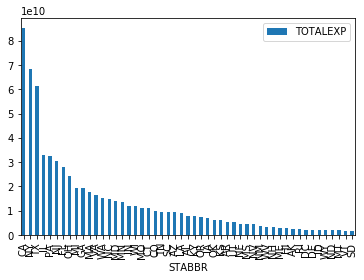

In [38]:
import matplotlib
%matplotlib inline
fiscal_df.groupby(['STABBR']).sum().sort_values(by = ['TOTALEXP'], ascending = False).reset_index().plot(kind = 'bar', 
                                                                                                       x = 'STABBR',
                                                                                                       y = 'TOTALEXP')
#fiscal_df.sort_values(by = ['TOTALEXP'], ascending = False).iloc[0:20]

In [53]:
df_totalexp = fiscal_df.groupby(['STABBR']).sum().sort_values(by = ['TFEDREV'], ascending = False).reset_index()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')


In [55]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd


fig = go.Figure(data=go.Choropleth(
    locations=df_totalexp['STABBR'], # Spatial coordinates
    z = df_totalexp['TFEDREV'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
   # colorscale = 'Reds',
    colorbar_title = "total expenditures ($)",
))

fig.update_layout(
    title_text = 'Total Expenditures on Education by state k-12',
    geo_scope='usa', # limite map scope to USA
)

fig.write_image("figures/total_fedrev_by_state.png")

fig.show()

### Problem 2 <br>
Visualize the relationship between school districts’ total revenue and expenditures. <br>
Which states have the most debt per student?<br>



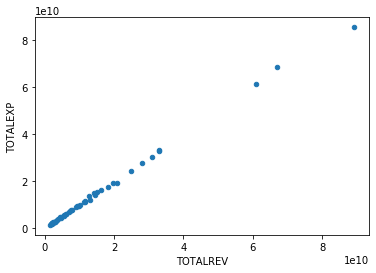

In [5]:
fiscal_df.groupby(['STABBR']).sum().reset_index().plot(kind = 'scatter', x = 'TOTALREV', y = 'TOTALEXP')

In [47]:
import os

os.getcwd()

'/Users/zlatanferic/Documents/DS5500/HW3'

In [52]:
fiscal_df.groupby(['STABBR']).sum().reset_index().to_csv('/Users/zlatanferic/Dropbox/temp/fiscal_df.csv', index = False)

In [6]:
#Debt is probably expenditures - revenue (in this case maybe even more as goverement gives tax and funding cuts to schools)

In [7]:
dff = fiscal_df.groupby(['STABBR']).sum().reset_index()
dff['debt_ratio'] = dff['TOTALEXP'] / dff['TOTALREV']
dff.sort_values(by = 'debt_ratio', ascending = False).head()

,STABBR,FIPST,YEAR,CCDNF,CENFILE,V33,MEMBERSCH,TOTALREV,TFEDREV,C14,...,W01,W31,W61,V95,V02,K14,CE1,CE2,WEIGHT,debt_ratio
28,ND,8626,3632,227,221,108530,106647,1788748961,155452961,35716961,...,41650961,213926961,371429961,-39,-39,-39,-245,-245,227,1.097767
27,NC,11692,5056,316,115,1544858,1544595,14128773932,1587975932,428540932,...,-68,-68,1470419932,340132932,245354932,41386932,12624656932,847740932,316,1.055410
29,NE,8804,4544,284,262,315958,315951,4398810973,346825973,91062973,...,220128973,537709973,1314258973,-27,-27,-27,-289,-289,284,1.054926
0,AK,108,864,54,54,132477,132477,2494691000,307320000,43804000,...,0,0,0,0,0,0,-54,-54,54,1.051438
23,MN,15903,9424,583,397,862021,863875,12889640951,685054951,141666951,...,1366821951,11479951,5324116951,-49,-49,-49,-613,-613,589,1.049912


In [8]:
#North Dakota has the highest debt-to-income Ratio

### Problem 3 <br>

The district-level performance metrics from EDFacts may be useful in your decision. <br>
However, to protect student privacy, the data in these datasets has been heavily “blurred” to prevent students <br>
from being identified. Therefore, most of the numeric metrics are presented as ranges in string format. In <br>
addition, censored and missing data must be imputed. <br>
Write and explain a function for processing a single column of “blurred” metrics into usable numeric values.<br>
Use it to process and then visualize the distribution of a performance metric of your choice. <br>

In [9]:
perform_math_df.shape

(89409, 231)

In [10]:
perform_math_df.head()

,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1516,ALL_MTH00PCTPROF_1516,MAM_MTH00NUMVALID_1516,...,MIG_MTH05NUMVALID_1516,MIG_MTH05PCTPROF_1516,MIG_MTH06NUMVALID_1516,MIG_MTH06PCTPROF_1516,MIG_MTH07NUMVALID_1516,MIG_MTH07PCTPROF_1516,MIG_MTH08NUMVALID_1516,MIG_MTH08PCTPROF_1516,MIG_MTHHSNUMVALID_1516,MIG_MTHHSPCTPROF_1516
0,ALABAMA,1,100005,Albertville City,10000500870,Ala Avenue Middle Sch,14APR17,707,36,2,...,NaN,NaN,NaN,NaN,19,21-39,20,LE20,NaN,NaN
1,ALABAMA,1,100005,Albertville City,10000500871,Albertville High Sch,14APR17,307,15,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,LT50
2,ALABAMA,1,100005,Albertville City,10000500879,Evans Elem Sch,14APR17,772,43,2,...,28,LE20,16,LE20,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100005,Albertville City,10000500889,Albertville Elem Sch,14APR17,852,55,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100006,Marshall County,10000600193,Kate Duncan Smith DAR Middle,14APR17,443,36,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
perform_math_df['ALL_MTH00PCTPROF_1516'].unique()

array(['36', '15', '43', '55', '33', '40-49', '6-9', '40', '15-19', '31',
       '60-64', '38', '46', '74', '39', '72', '65', '44', '75', '76',
       '73', '70', '56', '70-74', '81', '42', '79', '82', '84', '80',
       '85', '37', '20-24', '10-14', '55-59', '52', 'PS', '86', '24',
       '48', '30', 'LE5', '25-29', '35-39', '30-34', '16', '30-39', '77',
       '51', '65-69', '27', '57', '59', '28', '34', '32', '71', '50',
       '67', '68', '49', '83', '78', '45', '60', '13', '25', '50-54',
       '53', '40-44', '23', '63', '58', '54', '19', '45-49', '12', '10',
       '21', '18', '35', '41', '8', '14', '11', '3', '17', '75-79', '7',
       '20', '5', '2', '62', '26', '47', '69', '9', '22', '80-84',
       '50-59', '29', '70-79', '11-19', '87', '94', '96', '61', '66',
       '64', '4', '20-29', '6', 'LE10', '85-89', 'LE1', '91', '80-89',
       'LE20', '92', '90-94', '93', '89', 'LT50', '90', '40-59', '60-69',
       'GE50', 'GE90', '21-39', '60-79', '88', 'GE95', '97', 'GE80', '95',

In [12]:
perform_read_df['ALL_RLA00PCTPROF_1516'].unique()

array(['33', '31', '30', '36', '42', '27', '20-29', '25', '25-29', '22',
       '55-59', '37', '40-44', '61', '48', '68', '54', '55', '58',
       '45-49', '50', '62', '46', '57', '77', '70', '44', '66', '72',
       '73', '74', '43', '24', '35-39', '30-34', 'PS', '56', '67', '49',
       '34', '39', '47', '10-14', '15-19', '19', '50-54', '38', '60-64',
       '45', '40', '51', '65', '63', '60', '53', '41', '35', '23', '32',
       '21', '59', '12', '6-9', '14', '20-24', '13', '15', '17', '10',
       '28', '11', '52', '8', '18', '20', '26', '29', '40-49', '11-19',
       '50-59', '78', '81', '16', '65-69', '30-39', '7', '71', 'LE5',
       '70-74', '64', 'LE10', '80-84', '79', '70-79', '9', '80', '21-39',
       'LE20', '6', '84', '85-89', '82', '75', '76', 'LT50', '75-79',
       '69', 'GE50', '85', '80-89', 'GE90', '90-94', '40-59', 'GE80',
       '60-79', '60-69', '92', '86', '87', '90', '88', '83', '95', '3',
       '93', '97', '96', '4', 'GE95', '91', '98', 'GE99', 'LE1', '89',
 

For rates that are privacy protected, some of the privacy protections use the following symbols and translations: <br>
•	Greater than or equal to  =  ≥  =  GE <br>
•	Less than or equal to =  ≤  =  LE <br>
•	Greater than  =  >  =  GT <br>
•	Less than  =  <  =  LT <br>
•	Data suppressed to protect student privacy = PS <br>
For example, a graduation rate in the data file displaying “GE50” means the rate for that particular subgroup is “greater than or equal to 50%.” See table below for additional explanation of the way privacy protection for various student counts are applied. <br>


In [13]:
## couple considerations for the preprocessing function

## depending on how we implement we can only use raw data or impute

## we can use upper or lower intervals on range, or use mean value

## we can include / exclude GE, LE, etc.. 

## dealing with PS - impute with state level mean/mode, or exclude completely

## THe preprocessing can have a large effect on what we get back

In [14]:
import numpy as np
#preprocess the data
#takes in an item and range (0 = lower, 1 = upper for values suchas (44-55).. i.e. 0 would chose 44)
def process_col(item,opt1, opt2):
    
    
    #range givem.. can chose upper or lower based on input
    if len(item.split('-')) > 1:
        
        if opt1 == 1:
            lower = int(item.split('-')[0])
            upper = int(item.split('-')[1])
            #this is themidpoint of the interval
            act = (upper - lower)/ 2 + lower
        
        elif opt1 == 2:
            act = int(item.split('-')[0])
        elif opt1 == 3:
            act = int(item.split('-')[1])
    
    #case less than/equal to
    elif 'LE' in item:
        if opt2 == 1:
            act = int(item.replace('LE',''))
        if opt2 == 2:
            act = -85
    #case greater than
    elif 'GE' in item:
        if opt2 == 1:
            act = int(item.replace('GE',''))
        if opt2 == 2:
            act = -85
    #case less than
    elif 'LT' in item:
        if opt2 == 1:
            act = int(item.replace('LT',''))
        if opt2 == 2:
            act = -85
    elif 'PS' in item:
        #code for act
        
        ## this is a problem
        ## if a lot is missing will be skewed tlower significantly based on missingness 
        act = np.nan
    else:
        try:
            act = int(item)
        except: 
            #error code.. something went wrong
            act = -6
            
    return act
    
        
                

In [15]:
#math levels

perform_math_df['ALL_MTH00PCTPROF_1516_pcssd_2'] = \
        perform_math_df['ALL_MTH00PCTPROF_1516'].apply(lambda x : process_col(x,1,1))

#reding levels

perform_read_df['ALL_RLA00PCTPROF_1516_pcssd_2'] = \
        perform_read_df['ALL_RLA00PCTPROF_1516'].apply(lambda x : process_col(x,1,1))

In [16]:
#datagframe with the ge/le/etc (keeping only the %
# and also midpoint of interval
perform_math_mid = perform_math_df[~perform_math_df['ALL_MTH00PCTPROF_1516_pcssd_2'].isin([-77])]

#datagframe with the ge/le/etc (keeping only the %
perform_read_mid = perform_read_df[~perform_read_df['ALL_RLA00PCTPROF_1516_pcssd_2'].isin([-77])]

In [17]:
#clean
perform_math_mid['ALL_MTH00PCTPROF_1516_pcssd_2'].unique()


array([36. , 15. , 43. , 55. , 33. , 44.5,  7.5, 40. , 17. , 31. , 62. ,
       38. , 46. , 74. , 39. , 72. , 65. , 44. , 75. , 76. , 73. , 70. ,
       56. , 81. , 42. , 79. , 82. , 84. , 80. , 85. , 37. , 22. , 12. ,
       57. , 52. ,  nan, 86. , 24. , 48. , 30. ,  5. , 27. , 32. , 16. ,
       34.5, 77. , 51. , 67. , 59. , 28. , 34. , 71. , 50. , 68. , 49. ,
       83. , 78. , 45. , 60. , 13. , 25. , 53. , 23. , 63. , 58. , 54. ,
       19. , 47. , 10. , 21. , 18. , 35. , 41. ,  8. , 14. , 11. ,  3. ,
        7. , 20. ,  2. , 26. , 69. ,  9. , 54.5, 29. , 74.5, 87. , 94. ,
       96. , 61. , 66. , 64. ,  4. , 24.5,  6. ,  1. , 91. , 84.5, 92. ,
       93. , 89. , 90. , 49.5, 64.5, 69.5, 88. , 95. , 97. , 98. , 99. ])

In [18]:
#impute the missing data with state averages

perform_math_mid['ALL_MTH00PCTPROF_1516_pcssd_2'] = perform_math_mid.groupby('STNAM')['ALL_MTH00PCTPROF_1516_pcssd_2']\
                                .transform(lambda x: x.fillna(x.mean()))

perform_read_mid['ALL_RLA00PCTPROF_1516_pcssd_2'] = perform_read_mid.groupby('STNAM')['ALL_RLA00PCTPROF_1516_pcssd_2']\
                                .transform(lambda x: x.fillna(x.mean()))

In [19]:
perform_math_mid.columns

Index(['STNAM', 'FIPST', 'LEAID', 'LEANM', 'NCESSCH', 'SCHNAM', 'DATE_CUR',
       'ALL_MTH00NUMVALID_1516', 'ALL_MTH00PCTPROF_1516',
       'MAM_MTH00NUMVALID_1516',
       ...
       'MIG_MTH05PCTPROF_1516', 'MIG_MTH06NUMVALID_1516',
       'MIG_MTH06PCTPROF_1516', 'MIG_MTH07NUMVALID_1516',
       'MIG_MTH07PCTPROF_1516', 'MIG_MTH08NUMVALID_1516',
       'MIG_MTH08PCTPROF_1516', 'MIG_MTHHSNUMVALID_1516',
       'MIG_MTHHSPCTPROF_1516', 'ALL_MTH00PCTPROF_1516_pcssd_2'],
      dtype='object', length=232)

In [20]:
#dataframe with complete averages

math_df2 = perform_math_mid[['STNAM','ALL_MTH00PCTPROF_1516_pcssd_2']].groupby(['STNAM']).mean().reset_index()

read_df2 = perform_read_mid[['STNAM','ALL_RLA00PCTPROF_1516_pcssd_2']].groupby(['STNAM']).mean().reset_index()
math_df2.head()

,STNAM,ALL_MTH00PCTPROF_1516_pcssd_2
0,ALABAMA,39.371744
1,ARIZONA,37.106012
2,ARKANSAS,43.156188
3,BUREAU OF INDIAN AFFAIRS,26.291139
4,CALIFORNIA,34.823878


In [21]:
math_df2.columns

Index(['STNAM', 'ALL_MTH00PCTPROF_1516_pcssd_2'], dtype='object')

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
df['state_upper'] = [x.upper() for x in df['state']]
math_df3 = math_df2.merge(df[['code','state_upper']], left_on = 'STNAM', right_on = 'state_upper', how = 'outer', indicator = True)
read_df3 = read_df2.merge(df[['code','state_upper']], left_on = 'STNAM', right_on = 'state_upper', how = 'outer', indicator = True)

In [33]:
math_df3['STNAM'].unique()

array(['ALABAMA', 'ARIZONA', 'ARKANSAS', 'BUREAU OF INDIAN AFFAIRS',
       'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE',
       'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO',
       'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA',
       'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA',
       'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT',
       'VIRGIN ISLANDS', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA',
       'WISCONSIN', 'WYOMING', nan], dtype=object)

In [37]:
df['state_upper'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'FLORIDA', 'GEORGIA',
       'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS',
       'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS',
       'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA',
       'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO',
       'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA',
       'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA',
       'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT',
       'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'],
      dtype=object)

In [49]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd


fig = go.Figure(data=go.Choropleth(
    locations=read_df3['code'], # Spatial coordinates
    z = read_df3['ALL_RLA00PCTPROF_1516_pcssd_2'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
   # colorscale = 'Reds',
    colorbar_title = "% math competency",
))

fig.update_layout(
    title_text = 'average % math competency scores by state',
    geo_scope='usa', # limite map scope to USA
)

fig.write_image("figures/math_competancy_by_state.png")
fig.show()

In [50]:
fig = go.Figure(data=go.Choropleth(
    locations=math_df3['code'], # Spatial coordinates
    z = math_df3['ALL_MTH00PCTPROF_1516_pcssd_2'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
   # colorscale = 'Reds',
    colorbar_title = "% math competency",
))

fig.update_layout(
    title_text = 'average % math competency scores by state',
    geo_scope='usa', # limite map scope to USA
)
fig.write_image("figures/reading_competancy_by_state.png")
fig.show()

In [25]:
perform_read_df

,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,DATE_CUR,ALL_RLA00NUMVALID_1516,ALL_RLA00PCTPROF_1516,MAM_RLA00NUMVALID_1516,...,MIG_RLA05PCTPROF_1516,MIG_RLA06NUMVALID_1516,MIG_RLA06PCTPROF_1516,MIG_RLA07NUMVALID_1516,MIG_RLA07PCTPROF_1516,MIG_RLA08NUMVALID_1516,MIG_RLA08PCTPROF_1516,MIG_RLAHSNUMVALID_1516,MIG_RLAHSPCTPROF_1516,ALL_RLA00PCTPROF_1516_pcssd_2
0,ALABAMA,1,100005,Albertville City,10000500870,Ala Avenue Middle Sch,14APR17,687,33,2,...,NaN,NaN,NaN,17,LE20,17,LE20,NaN,NaN,33.0
1,ALABAMA,1,100005,Albertville City,10000500871,Albertville High Sch,14APR17,307,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,LT50,31.0
2,ALABAMA,1,100005,Albertville City,10000500879,Evans Elem Sch,14APR17,759,30,1,...,LE20,14,LT50,NaN,NaN,NaN,NaN,NaN,NaN,30.0
3,ALABAMA,1,100005,Albertville City,10000500889,Albertville Elem Sch,14APR17,839,36,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
4,ALABAMA,1,100006,Marshall County,10000600193,Kate Duncan Smith DAR Middle,14APR17,442,42,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88823,WYOMING,56,5606240,Washakie County School District #1,560624000343,Worland High School,14APR17,106,30-34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
88824,WYOMING,56,5606240,Washakie County School District #1,560624000344,Worland Middle School,14APR17,332,55,NaN,...,NaN,NaN,NaN,1,PS,1,PS,NaN,NaN,55.0
88825,WYOMING,56,5606240,Washakie County School District #1,560624000345,East Side Elementary,14APR17,124,75-79,NaN,...,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0
88826,WYOMING,56,5606240,Washakie County School District #1,560624000346,South Side Elementary,14APR17,117,75-79,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0


### Problem 4 <br>
You are tasked with cutting 15% of the U.S. federal budget currently being spent on funding school districts. <br>
How much money is this? <br>
Choose which school districts will have their funding cut and how this will be done. <br>
(You should produce a table of LEA IDs and the dollar amount by which their federal funding will be cut – <br>
you do not need print the entire table.) <br>

In [26]:
fiscal_df = fiscal_df.query('TFEDREV > 0')


In [27]:
fiscal_df['percnt_TFEDREV'] = fiscal_df['TFEDREV'] / fiscal_df['TFEDREV'].sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
fiscal_df.loc[:,'cut_rev_by'] = fiscal_df['percnt_TFEDREV'] * .15 * fiscal_df['TFEDREV'].sum()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
fiscal_df['cut_rev_by'].sum()

8340411300.0

In [30]:
# GET A REFERENCE FOR THE AMOUNTS BEING SPENT / AND CUTTING because this number could vary based on if you 
# pick the wrong forumla


In [31]:
# Problem 5

Provide a statement for your supervisor justifying your decisions on which school districts will lose funding.

SyntaxError: invalid syntax (<ipython-input-31-a29d7188af37>, line 3)